In [1]:
import numpy as np
import glob
import os
from matplotlib import pyplot as plt
import pickle
from misc.jp2_converter import Accessor

glymur not setup correctly


/usr/local/lib/python3.8/dist-packages/glymur/config.py:143: UserWarning: The openjp2 library at /workspace/lib/libopenjp2.so.2.3.1 could not be loaded.
  warnings.warn(msg, UserWarning)


In [2]:
outdir='/data/eval2/'
datadir='/data/special/jp2cache/'

In [3]:
outname=os.listdir(outdir)[0]
outname

'nucleus_B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.dat'

In [4]:
dataname=outname[8:]
dataname

'B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.dat'

In [5]:
# [2]+list(info['shape'])[:2]

In [6]:
info = pickle.load(open(datadir+'/'+dataname.replace('.dat','_info.pkl'),'rb'))
pred=np.memmap(outdir+'/'+outname,mode='r',shape=tuple([2]+list(info['shape'])[:2]),dtype=np.float32)

In [7]:
pred.shape

(2, 83590, 81590)

In [8]:
shp = (164,164)
padding=(256-164)//2
imgaccessor=Accessor(datadir+'/'+dataname,shp,padding)

In [9]:
imgaccessor.ntiles

253980

In [10]:
imgaccessor.ntiles_c, imgaccessor.ntiles_r

(498, 510)

Extent(point1=Point(x=13238, y=32590), point2=Point(x=13494, y=32846))

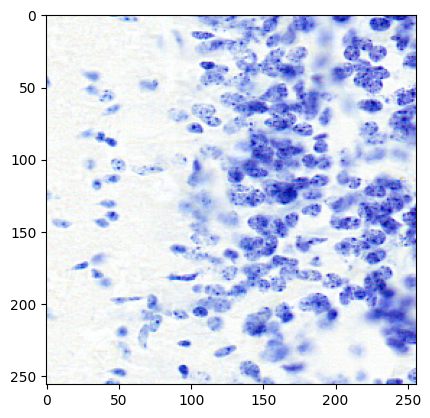

In [11]:
arr,rgn,_ = imgaccessor[498*199+81]
plt.imshow(arr)
rgn

In [12]:
c1,r1 = rgn.point1
c2,r2 = rgn.point2
output = pred[1,r1:r2,c1:c2]

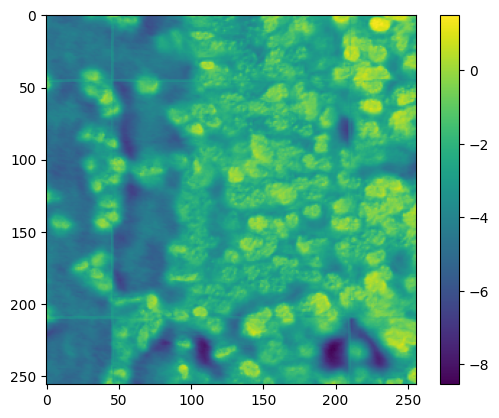

In [13]:
plt.imshow(output)
plt.colorbar()